# **PCLab#2** - Group 10 - Clement Guyot de la Pommeraye, Erik van der Sangen, Jacopo Cagnacci, Giacomo Bellodi

* **Time spent**: 3hrs x team member
* **Level of difficulty**: 7/10

In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.stats import linregress
from scipy import stats


## **Task 1**: Import the data and describe the sample

* Use the PCLab_Data.xlsx to produce scatter plots of each stocks’ daily returns against the market daily returns

In [5]:
df = pd.read_csv("/content/Data_PCLab1_Stock.csv")
df.sort_values(by="Date", ascending=True)



,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [6]:
daily_return_df = df.set_index('Date').pct_change()
display(daily_return_df.head())

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
Date,,,,,,,,,
2012-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-13,-0.003749,-0.012051,-0.001660,0.018137,0.014153,-0.007699,-0.193274,-0.007385,-0.004948
2012-01-17,0.011648,0.008579,0.005986,-0.008097,0.018159,0.004689,0.167179,0.005744,0.003553
2012-01-18,0.010384,-0.002392,0.002645,0.039184,0.042827,0.005944,0.007895,0.006889,0.011108
2012-01-19,-0.003169,0.006661,0.002967,0.005499,0.026446,-0.003038,-0.001865,0.010523,0.004939


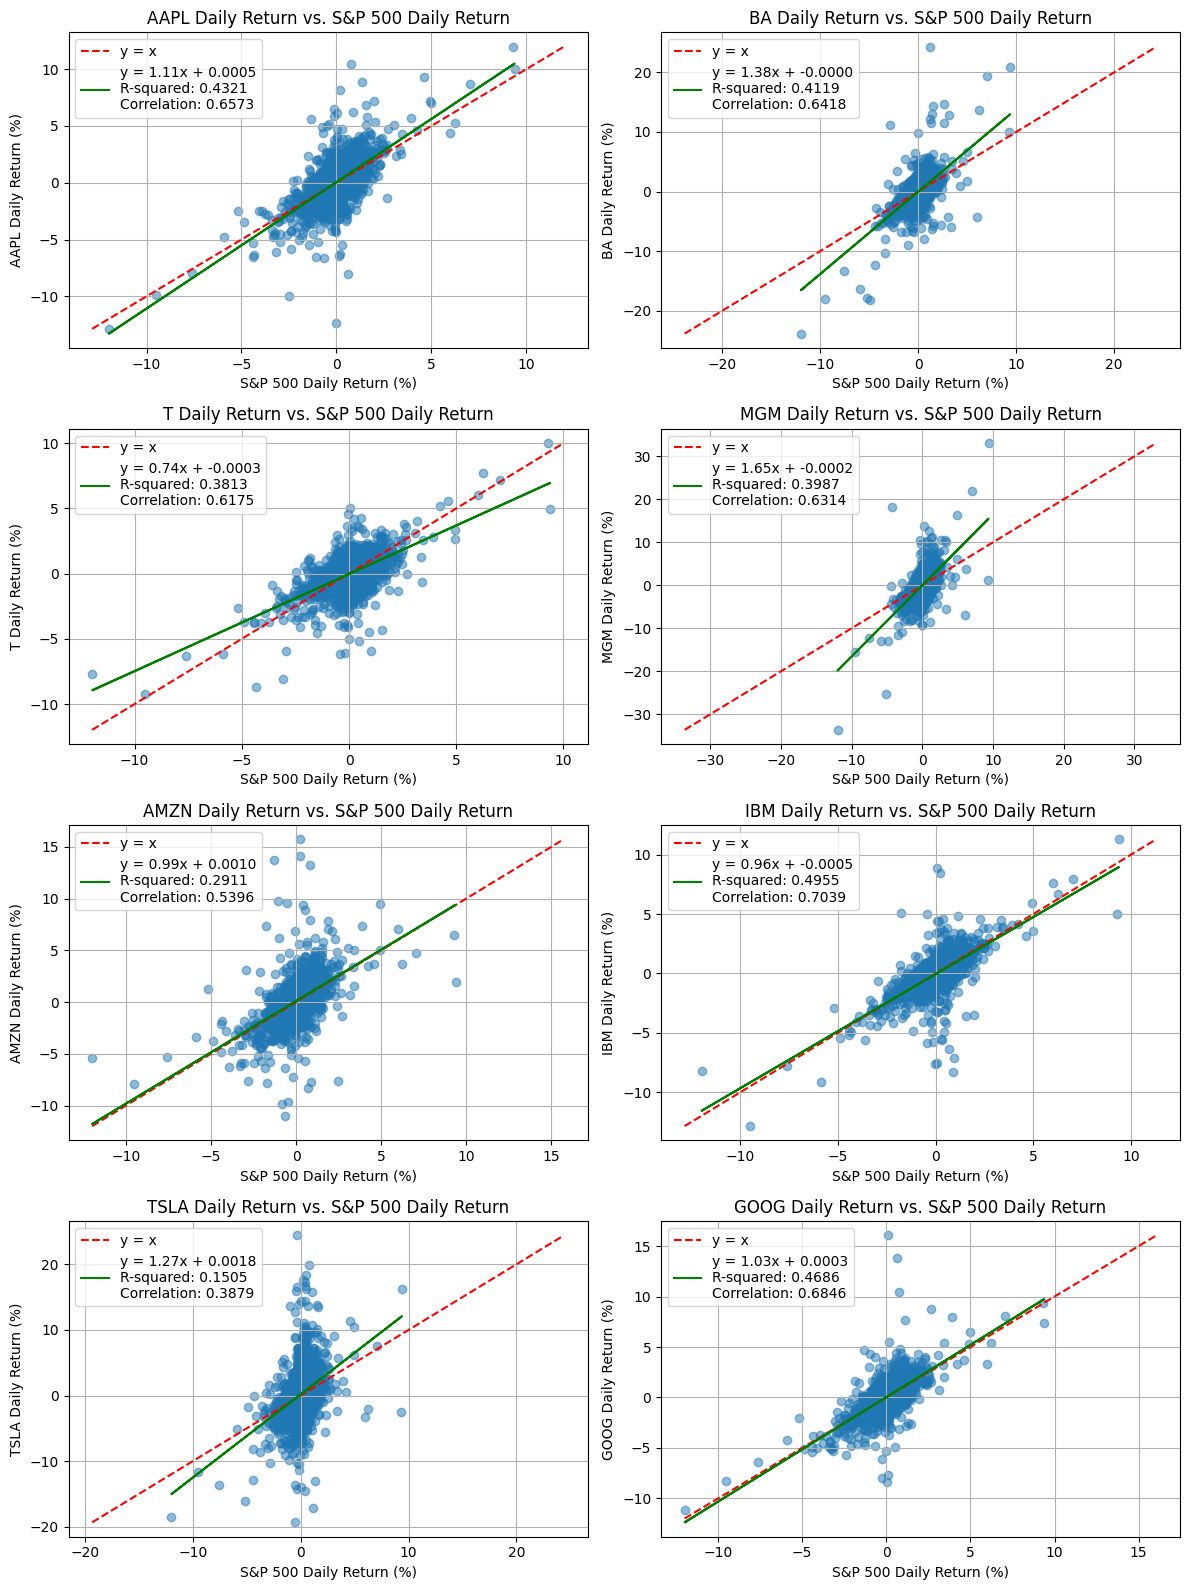

In [7]:

stocks = daily_return_df.columns.drop('sp500')
fig, axes = plt.subplots(4, 2, figsize=(12, 16)) # Create a 4x2 grid of subplots
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, stock in enumerate(stocks):
    ax = axes[i] # Select the current subplot

    ax.scatter(daily_return_df['sp500'] * 100, daily_return_df[stock] * 100, alpha=0.5)
    ax.set_title(f'{stock} Daily Return vs. S&P 500 Daily Return')
    ax.set_xlabel('S&P 500 Daily Return (%)')
    ax.set_ylabel(f'{stock} Daily Return (%)')

    # Add the line y=x
    limits = [min(daily_return_df['sp500'].min(), daily_return_df[stock].min()),
              max(daily_return_df['sp500'].max(), daily_return_df[stock].max())]
    ax.plot([limit * 100 for limit in limits], [limit * 100 for limit in limits], color='red', linestyle='--', label='y = x')

    # Add trend line and equation using OLS
    valid_returns = daily_return_df[[stock, 'sp500']].dropna()
    if not valid_returns.empty:
        X = sm.add_constant(valid_returns['sp500']) # Add a constant for the intercept
        model = sm.OLS(valid_returns[stock], X).fit()
        slope = model.params['sp500'] # Access by name
        intercept = model.params['const'] # Access by name
        r_squared = model.rsquared
        correlation = valid_returns['sp500'].corr(valid_returns[stock]) # Calculate correlation using pandas

        # Create a combined label for the legend with a new line
        combined_label = f'y = {slope:.2f}x + {intercept:.4f}\nR-squared: {r_squared:.4f}\nCorrelation: {correlation:.4f}' # Increased decimal places for intercept
        ax.plot(valid_returns['sp500'] * 100, (slope * valid_returns['sp500'] + intercept) * 100, color='green', linestyle='-', label=combined_label)
        ax.legend(loc='upper left') # Position legend in the upper left

    ax.grid(True)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

***Stocks (ranked by strength of correlation):***

**IBM: Correlation 0.70 (strongest of the group).** IBM’s daily returns track the market more closely than the others, reflecting its reliance on corporate IT spending and global business activity. The slope is close to 1.0, and R² of 0.50 shows the index explains about half of its daily variance. This is the most “market-like” stock in the set.

**GOOG: Correlation 0.68 (strong).** Alphabet’s results follow the S&P closely, since advertising and cloud spending move with business cycles. The slope is slightly above 1.0, and R² is 0.47, meaning nearly half its variation is explained by the index. This makes it one of the more reliable “market trackers” in the group.

**AAPL: Correlation 0.66 (moderately strong).** Apple tends to move in line with the S&P 500, though not perfectly. This makes sense since Apple is a tech leader and large index constituent, so its returns often reflect broad market sentiment. A slope of 1.11 shows slightly amplified moves, with R² of 0.43 suggesting that almost half of daily swings are tied to the market.

**BA: Correlation 0.64 (moderately strong).** Boeing’s returns track the S&P reasonably well but with higher volatility. As a cyclical manufacturer, its ups and downs often coincide with market cycles, but company-specific risks (production delays, defense contracts) keep the relationship from being tighter. The slope is high at 1.38, and R² is 0.41.

**MGM: Correlation 0.63 (moderately strong).** MGM’s performance is tied to consumer discretionary spending, which tends to follow economic cycles, so it moves with the S&P. Its high slope (1.65) reflects amplified swings, but the correlation isn’t stronger because local events, licensing, and business-specific news also play big roles. R² is 0.40.

**T: Correlation 0.62 (moderately strong).** AT&T is positively correlated but less sensitive to market shifts. Its defensive, subscription-based model and high dividend reduce volatility relative to the S&P (slope of 0.74). The R² of 0.38 suggests that while broad sentiment matters, firm-specific issues explain a lot of its moves.

**AMZN: Correlation 0.54 (moderate).** Amazon has the weakest correlation of the group except Tesla. Macro conditions matter, but company-specific drivers like AWS performance and logistics investments cause large independent moves. With a slope of ~1.0, its average sensitivity matches the market, but R² is low at 0.29.

**TSLA: Correlation 0.39 (weak).** Tesla’s price movements are driven far more by company-specific news and sentiment than by the broad market. Although its slope is high at 1.27 (when it moves with the market, it tends to amplify), the very low R² of 0.15 shows little explanatory power from the S&P. Correlation here is the weakest.

## **Task #2** : Compute alpha and beta

In [8]:

#this part is a repetition of the 'preprocessing' of the data -- needed as we divided the work among the team members

df = pd.read_csv('Data_PCLab1_Stock.csv')
df['Date'] = pd.to_datetime(df['Date'])

#  Sort the stock data by date and print the number of stocks
df.sort_values(by='Date', inplace=True)

def normalize_prices(dataframe):
    df_normalized = dataframe.copy()
    for column in df_normalized.columns:
        if column != 'Date':
            df_normalized[column] = df_normalized[column] / df_normalized[column].iloc[0]
    return df_normalized

df_normalized = normalize_prices(df)
df_normalized.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2012-01-13,0.996251,0.987949,0.998340,1.018137,1.014153,0.992301,0.806726,0.992615,0.995052
2,2012-01-17,1.007855,0.996424,1.004316,1.009893,1.032570,0.996954,0.941593,0.998317,0.998587
3,2012-01-18,1.018320,0.994040,1.006972,1.049464,1.076792,1.002880,0.949027,1.005193,1.009680
4,2012-01-19,1.015093,1.000662,1.009960,1.055235,1.105269,0.999834,0.947257,1.015771,1.014666


In [9]:
# Define a function to calculate stocks daily returns (for all stocks)
def calculate_daily_returns(dataframe):
    df_returns = dataframe.copy()
    for column in df_returns.columns:
        if column != 'Date':
            df_returns[column] = df_returns[column].pct_change()  # Calculate daily returns
    df_returns.dropna(inplace=True)  # Remove NaN values resulting from pct_change
    return df_returns

df_returns = calculate_daily_returns(df_normalized)
df_returns.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
1,2012-01-13,-0.003749,-0.012051,-0.001660,0.018137,0.014153,-0.007699,-0.193274,-0.007385,-0.004948
2,2012-01-17,0.011648,0.008579,0.005986,-0.008097,0.018159,0.004689,0.167179,0.005744,0.003553
3,2012-01-18,0.010384,-0.002392,0.002645,0.039184,0.042827,0.005944,0.007895,0.006889,0.011108
4,2012-01-19,-0.003169,0.006661,0.002967,0.005499,0.026446,-0.003038,-0.001865,0.010523,0.004939
5,2012-01-20,-0.017417,-0.000529,0.002959,-0.012500,-0.018102,0.044316,-0.005979,-0.083775,0.000669


* Apply the CAPM: run an OLS regression of stock i returns on market returns, over the whole period. Assume rf = 0. Are the estimates significant?
* Plot the beta and alpha for the 8 stocks. Which stock has the highest (lowest) beta and alpha ?

In [10]:

from statsmodels.stats.stattools import jarque_bera


# 1. Compute CAPM alphas & betas
#keep only stocks columns (no date, no s&p500)
stock_cols = [c for c in df_returns.columns if c not in ['Date','sp500']] #keep only stocks columns (no date, no s&p500)


residuals = {}        # series of residuals per stock
diag_rows  = []       # residual diagnostics

rows = []

#loop that regresses over each stock on the market returns
for t in stock_cols:
    y = df_returns[t] #dependent variable = daily stock return
    X = sm.add_constant(df_returns['sp500']) #independent variable = daily s&p500 return
    X = X.rename(columns={'const':'alpha'})
    # Use robust SEs (daily data are heteroskedastic)
    m = sm.OLS(y, X).fit(cov_type='HC1')

    #store key results
    rows.append({
        'ticker': t,
        'alpha': m.params['alpha'],
        'beta':  m.params['sp500'],
        'alpha_pvalue': m.pvalues['alpha'],
        'beta_pvalue':  m.pvalues['sp500'],
        'R2': m.rsquared
    })


    # for the following part: predicted values and residuals (errors)
    y_hat = m.predict(X)
    e = (y - y_hat).dropna()
    residuals[t] = e

    # small diagnostics for each stock
    jb_stat, jb_p, skew, kurt = jarque_bera(e)
    diag_rows.append({
        'ticker': t,
        'mean_e': round(e.mean(), 3),
        'std_e': round(e.std(ddof=1), 3),
        'skew_e': round(skew, 3),
        'excess_kurt_e': round(kurt, 3),
        'JB_pvalue': round(float(jb_p), 3)
    })

res = pd.DataFrame(rows).set_index('ticker')



# 3. Print Highest / lowest betas and alphas
hi_beta  = res['beta'].idxmax(),  res['beta'].max()
lo_beta  = res['beta'].idxmin(),  res['beta'].min()
hi_alpha = res['alpha'].idxmax(), res['alpha'].max()
lo_alpha = res['alpha'].idxmin(), res['alpha'].min()

print(f"Highest beta:  {hi_beta[0]} = {hi_beta[1]:.4f}")
print(f"Lowest beta:   {lo_beta[0]} = {lo_beta[1]:.4f}")
print(f"Highest alpha: {hi_alpha[0]} = {hi_alpha[1]:.6f} (daily)")
print(f"Lowest alpha:  {lo_alpha[0]} = {lo_alpha[1]:.6f} (daily)")

#mark significance with stars
def star(p):
    return '***' if p<0.01 else '**' if p<0.05 else '*' if p<0.10 else ''
table = res.copy()
table['alpha_star'] = [star(p) for p in table['alpha_pvalue']]
table['beta_star']  = [star(p) for p in table['beta_pvalue']]

print("\nEstimates (stars = significance):")
table[['alpha','alpha_pvalue','alpha_star','beta','beta_pvalue','beta_star','R2']].sort_values('beta', ascending=False)


Highest beta:  MGM = 1.6536
Lowest beta:   T = 0.7446
Highest alpha: TSLA = 0.001759 (daily)
Lowest alpha:  IBM = -0.000535 (daily)

Estimates (stars = significance):


,alpha,alpha_pvalue,alpha_star,beta,beta_pvalue,beta_star,R2
ticker,,,,,,,
MGM,-0.000169,0.713165,,1.653568,5.657205e-29,***,0.398728
BA,-0.000023,0.950832,,1.382867,2.453745e-48,***,0.411941
TSLA,0.001759,0.009392,***,1.268611,3.556123e-40,***,0.150482
AAPL,0.000528,0.067307,*,1.112891,9.847074e-303,***,0.432070
GOOG,0.000334,0.179058,,1.034881,1.520176e-293,***,0.468638
AMZN,0.001023,0.003659,***,0.991732,6.127235e-60,***,0.291125
IBM,-0.000535,0.014696,**,0.960416,1.731484e-162,***,0.495525
T,-0.000286,0.183462,,0.744630,4.789958e-124,***,0.381261


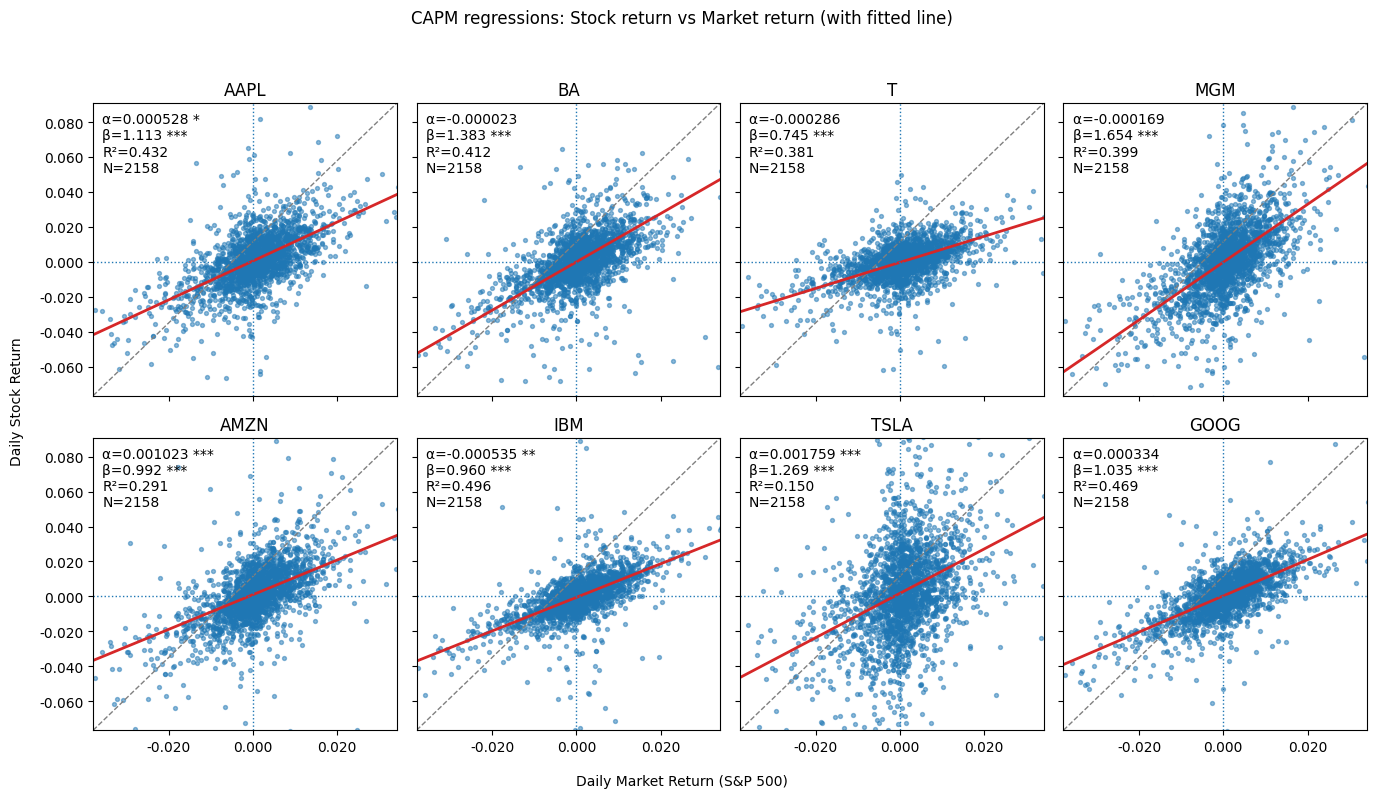

In [11]:
from matplotlib.ticker import FormatStrFormatter

# Global axis limits
x_all = df_returns['sp500'].dropna().values
y_all = df_returns[stock_cols].stack().dropna().values
x_lo, x_hi = np.percentile(x_all, [0.5, 99.5])
y_lo, y_hi = np.percentile(y_all, [0.5, 99.5])

fig, axes = plt.subplots(2, 4, figsize=(14, 8), sharex=True, sharey=True)
axes = axes.ravel()

for ax, t in zip(axes, stock_cols):
    pair = df_returns[[t, 'sp500']].dropna()
    x = pair['sp500'].values
    y = pair[t].values

    # scatter
    ax.scatter(x, y, s=8, alpha=0.5)

    # 45° line (beta=1, alpha=0)
    ax.plot([x_lo, x_hi], [y_lo, y_hi],
            linestyle='--', linewidth=1, color='gray', zorder=1)

    # CAPM line using your estimated alpha & beta
    a = float(res.loc[t, 'alpha'])
    b = float(res.loc[t, 'beta'])
    grid = np.linspace(x.min(), x.max(), 200)
    ax.plot(grid, a + b*grid, color='tab:red', linewidth=2)

    # reference axes
    ax.axhline(0, linestyle=':', linewidth=1)
    ax.axvline(0, linestyle=':', linewidth=1)

    # annotation block
    ap = float(res.loc[t, 'alpha_pvalue'])
    bp = float(res.loc[t, 'beta_pvalue'])
    text = (
        f"α={a:.6f} {star(ap)}\n"
        f"β={b:.3f} {star(bp)}\n"
        f"R²={res.loc[t,'R2']:.3f}\n"
        f"N={len(pair)}"
    )
    ax.text(0.03, 0.97, text, transform=ax.transAxes, va='top')

    ax.set_title(t)
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

# unified limits across panels
for ax in axes:
    ax.set_xlim(x_lo, x_hi)
    ax.set_ylim(y_lo, y_hi)

fig.suptitle('CAPM regressions: Stock return vs Market return (with fitted line)', y=0.99)
fig.text(0.5, 0.02, 'Daily Market Return (S&P 500)', ha='center')
fig.text(0.02, 0.5, 'Daily Stock Return', va='center', rotation='vertical')
plt.tight_layout(rect=[0.03, 0.04, 1, 0.96])
plt.show()


By giving a first look to this visual representation it seems that each stock tends to move with the market on a day-to-day basis.
TSLA, MGM, BA show larger dispersion and amplification, while  T, IBM, GOOG look tighter and track the market more closely.

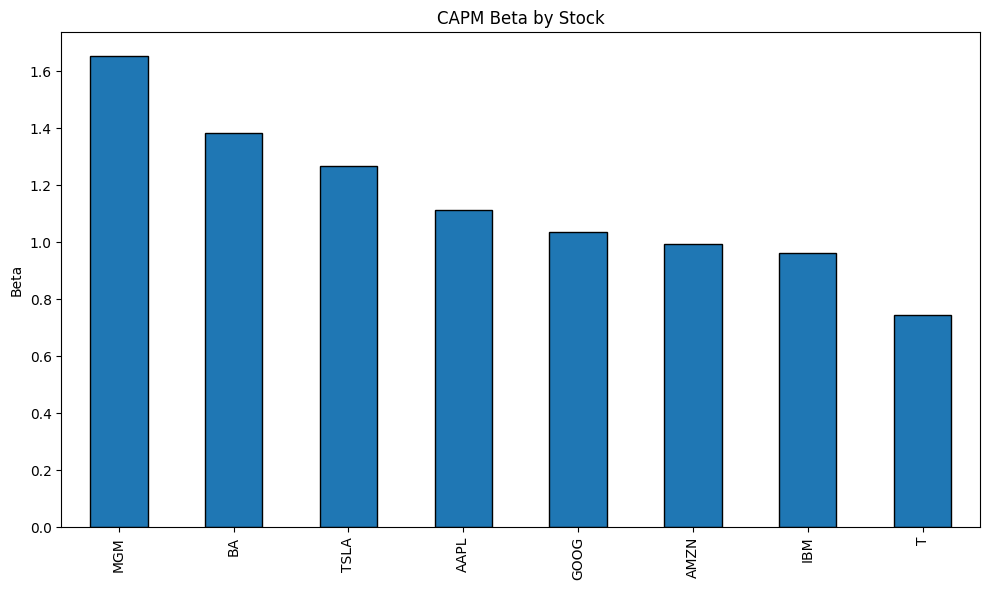

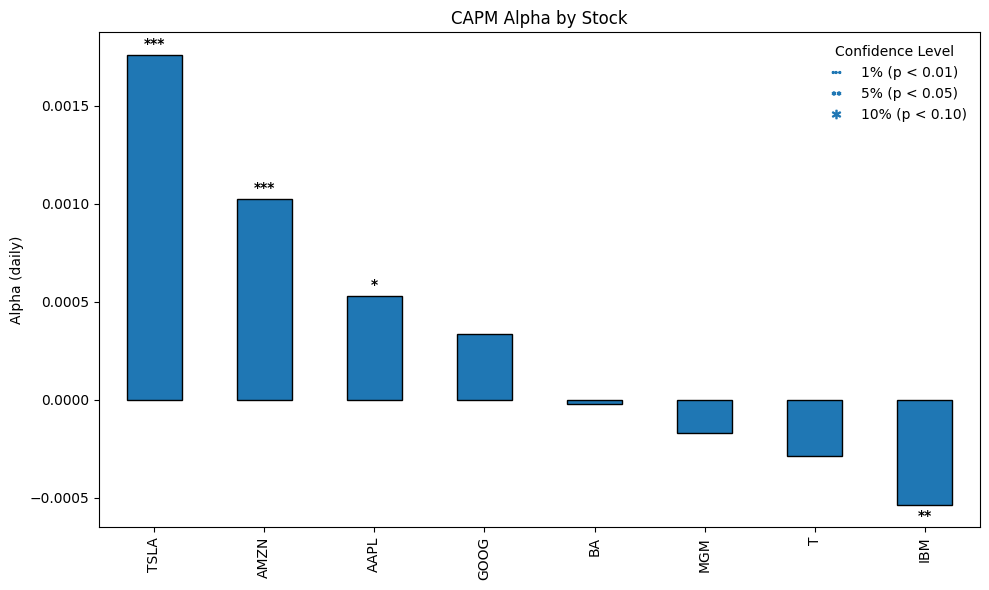

In [12]:
#Plot bar charts of Betas and Alphas

#Betas
res_beta_sorted = res.sort_values('beta', ascending=False)
plt.figure(figsize=(10,6))
res_beta_sorted['beta'].plot(kind='bar', edgecolor='black')
plt.title('CAPM Beta by Stock')
plt.ylabel('Beta')
plt.xlabel('')
plt.tight_layout()
plt.show()



# Alphas
from matplotlib.lines import Line2D

res_alpha_sorted = res.sort_values('alpha', ascending=False)

fig, ax = plt.subplots(figsize=(10,6))
res_alpha_sorted['alpha'].plot(kind='bar', edgecolor='black', ax=ax)
ax.set_title('CAPM Alpha by Stock')
ax.set_ylabel('Alpha (daily)')
ax.set_xlabel('')

# stars aligned to the sorted order
alpha_stars = res.loc[res_alpha_sorted.index, 'alpha_pvalue'].apply(
    lambda p: '***' if p < 0.01 else '**' if p < 0.05 else '*' if p < 0.10 else ''
)

# annotate stars on top of bars
for patch, star_txt in zip(ax.patches, alpha_stars):
    if not star_txt:
        continue
    h = patch.get_height()
    x = patch.get_x() + patch.get_width()/2
    y = h
    va = 'bottom' if h >= 0 else 'top'
    offset = 3 if h >= 0 else -3
    ax.annotate(star_txt, (x, y), xytext=(0, offset),
                textcoords='offset points', ha='center', va=va,
                fontsize=10, fontweight='bold')

# legend explaining significance levels
legend_elements = [
    Line2D([0], [0], marker='$***$', linestyle='None', label='1% (p < 0.01)'),
    Line2D([0], [0], marker='$**$',  linestyle='None', label='5% (p < 0.05)'),
    Line2D([0], [0], marker='$*$',   linestyle='None', label='10% (p < 0.10)'),
]
ax.legend(handles=legend_elements, title='Confidence Level', loc='upper right', frameon=False)

plt.tight_layout()
plt.show()

**COEFFICIENTS INTERPRETATION**

All betas are significant at the 1% confidence level and this means that market returns (s&p500) explain a meaningful share of each stock daily movements. The majority of alphas are very close to zero and not significant (MGM, BA, GOOG, T) showing that any extra return that is not accounted by the market is noise.

MGM shows the highest beta among the stocks (1.655). It means that market shocks for this company are amplified as it is highly dependent from economoic cycles affecting the market.
T has the lowest beta (0.745). The result makes sense given the nature of this business: a telecomunication company whose demand and business performance are less influenced by market shocks.


TSLA and AMZN have positive, significant alphas (≈ 0.001759 and 0.001023 per day, respectively). These numbers look small but if annulaized, they reflect high returns (roughly 56% and 29% in-sample). For these stocks, returns are not campured only by 1 factor (the market).
AAPL has a small, marginal alpha (≈10% significance).

IBM shows a negative, significant alpha (≈ −0.000535), indicating persistent underperformance relative to the market-implied return.
MGM, BA, GOOG, T have not significant alphas: when market risk is accounted for, there is no systematic over- or under-performance.


* Use the observed returns and the predicted ones to compute and plot the histogram of error terms εi for each stock.

In [13]:
# residuals

diag = pd.DataFrame(diag_rows).set_index('ticker').loc[stock_cols]
print("Residual diagnostics (3 dp):")
print(diag)

# Calculate the mean of residuals for each stock
residual_means = {ticker: res.mean() for ticker, res in residuals.items()}

print("\nMean of residuals for each stock:")
for ticker, mean_e in residual_means.items():
    print(f"{ticker}: {mean_e:.6f}")

Residual diagnostics (3 dp):
        mean_e  std_e  skew_e  excess_kurt_e  JB_pvalue
ticker                                                 
AAPL       0.0  0.013  -0.068         12.026        0.0
BA         0.0  0.017   1.292         29.712        0.0
T          0.0  0.010  -0.813          8.763        0.0
MGM       -0.0  0.021   0.652         22.834        0.0
AMZN       0.0  0.016   1.225         20.345        0.0
IBM       -0.0  0.010  -0.862         20.888        0.0
TSLA       0.0  0.032   0.663         10.917        0.0
GOOG       0.0  0.012   1.824         34.420        0.0

Mean of residuals for each stock:
AAPL: 0.000000
BA: 0.000000
T: 0.000000
MGM: -0.000000
AMZN: 0.000000
IBM: -0.000000
TSLA: 0.000000
GOOG: 0.000000


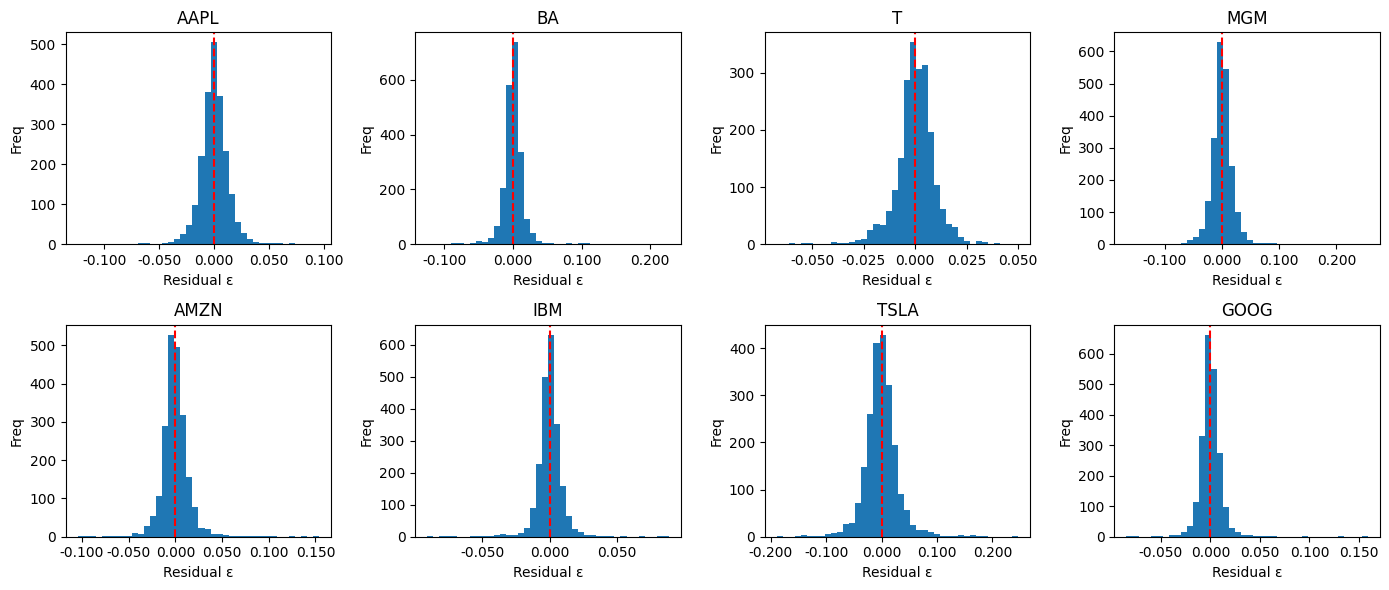

In [14]:
from matplotlib.ticker import FormatStrFormatter

# Histograms of residuals
fig, axes = plt.subplots(2, 4, figsize=(14, 6))
axes = axes.ravel()

for ax, t in zip(axes, stock_cols):
    e = residuals[t]
    mu = float(e.mean())

    # histogram
    ax.hist(e, bins=40)

    # mean line
    ax.axvline(mu, linestyle='--', linewidth=1.5, color = 'r')

    ax.set_title(t)
    ax.set_xlabel("Residual ε")
    ax.set_ylabel("Freq")
    ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.tight_layout()
plt.show()


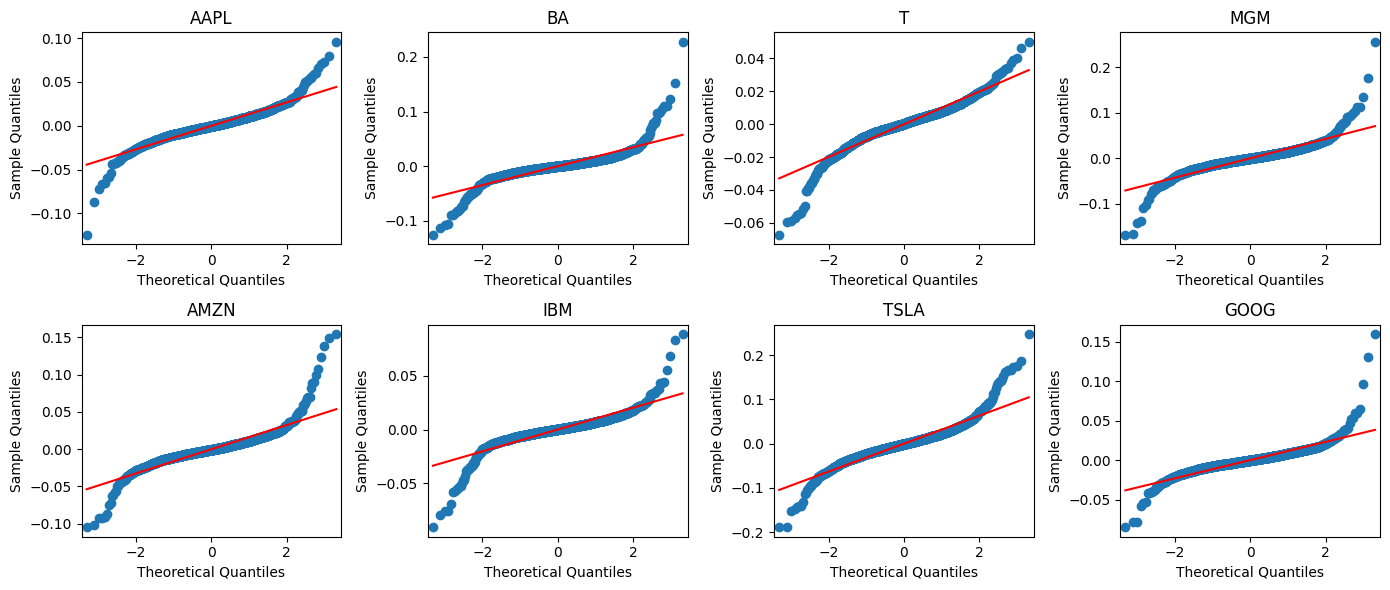

In [15]:
fig, axes = plt.subplots(2, 4, figsize=(14, 6))
axes = axes.ravel()
for ax, t in zip(axes, stock_cols):
    sm.qqplot(residuals[t].dropna(), line='s', ax=ax)
    ax.set_title(t)
plt.tight_layout(); plt.show()


All residuals histograms have mean zero, which means that the CAPM looks unbiased on average.
The width of the distributions differs: TSLA, MGM, and BA show the highest spreads (more idiosyncratic noise), while IBM, GOOG, and T are noticeably tighter, with AAPL and AMZN in between. The Q–Q plots reinforce this: each series displays the classic S-shape, with observations deviating from the straight line in both tails, indicating fat tails (excess kurtosis) and a slight right-skew that is most visible for TSLA, MGM, BA, and AMZN. In practice this means daily residuals are non-normal and likely heteroskedastic.

## Build equally weight portfolio with 4 riskier assets

In [16]:

top4 = res['beta'].sort_values(ascending=False).head(4).index.tolist()
print(top4)

['MGM', 'BA', 'TSLA', 'AAPL']


In [17]:
#create new df with final results

tickers = ['MGM', 'BA', 'TSLA', 'AAPL']
w = np.repeat(0.25, 4)


df = df_returns[['Date', *tickers, 'sp500']].copy()

# realized equal-weight portfolio return
df['daily_return_portfolio'] = df[tickers].dot(w)

# CAPM-predicted portfolio return:  r̂_p,t = α_p + β_p * r_m,t
alpha_p = float(res.loc[tickers, 'alpha'] @ w)
beta_p  = float(res.loc[tickers, 'beta']  @ w)
df['capm_portfolio'] = alpha_p + beta_p * df['sp500']

df.head()


,Date,MGM,BA,TSLA,AAPL,sp500,daily_return_portfolio,capm_portfolio
1,2012-01-13,0.018137,-0.012051,-0.193274,-0.003749,-0.004948,-0.047735,-0.006178
2,2012-01-17,-0.008097,0.008579,0.167179,0.011648,0.003553,0.044827,0.005336
3,2012-01-18,0.039184,-0.002392,0.007895,0.010384,0.011108,0.013767,0.015569
4,2012-01-19,0.005499,0.006661,-0.001865,-0.003169,0.004939,0.001781,0.007213
5,2012-01-20,-0.012500,-0.000529,-0.005979,-0.017417,0.000669,-0.009106,0.001431


In [18]:
# cumulative total return
df['cum_return_portfolio'] = (1 + df['daily_return_portfolio']).cumprod() - 1
df['cum_return_capm']      = (1 + df['capm_portfolio']).cumprod() - 1

# market cumulative return for reference
df['cum_return_sp500']     = (1 + df['sp500']).cumprod() - 1

df.head()

,Date,MGM,BA,TSLA,AAPL,sp500,daily_return_portfolio,capm_portfolio,cum_return_portfolio,cum_return_capm,cum_return_sp500
1,2012-01-13,0.018137,-0.012051,-0.193274,-0.003749,-0.004948,-0.047735,-0.006178,-0.047735,-0.006178,-0.004948
2,2012-01-17,-0.008097,0.008579,0.167179,0.011648,0.003553,0.044827,0.005336,-0.005047,-0.000875,-0.001413
3,2012-01-18,0.039184,-0.002392,0.007895,0.010384,0.011108,0.013767,0.015569,0.008651,0.014681,0.009680
4,2012-01-19,0.005499,0.006661,-0.001865,-0.003169,0.004939,0.001781,0.007213,0.010448,0.022000,0.014666
5,2012-01-20,-0.012500,-0.000529,-0.005979,-0.017417,0.000669,-0.009106,0.001431,0.001246,0.023463,0.015345


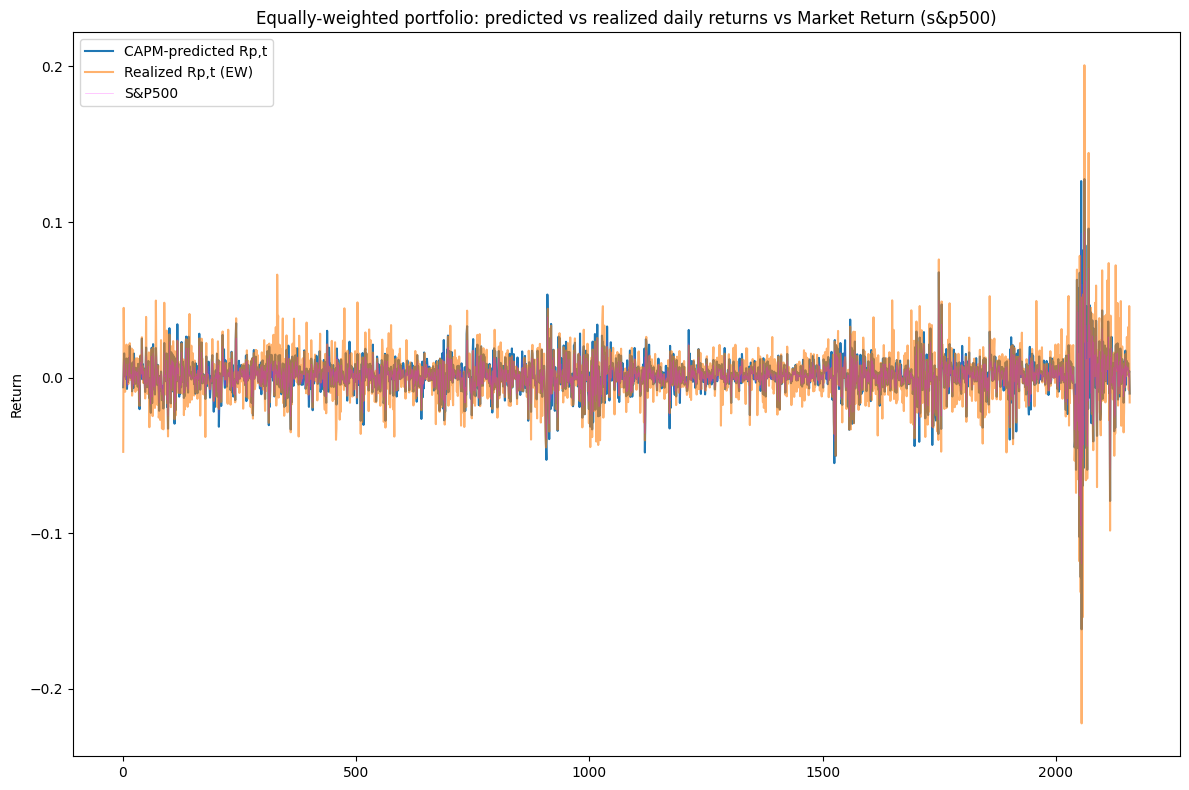

In [19]:
#plot of returns
plt.figure(figsize=(12,8))
plt.plot(df['capm_portfolio'].index, df['capm_portfolio'], label='CAPM-predicted Rp,t')
plt.plot(df['daily_return_portfolio'].index, df['daily_return_portfolio'], label='Realized Rp,t (EW)', alpha=0.6)
plt.plot(df['sp500'].index, df['sp500'], label = 'S&P500', alpha = 0.3, color = 'magenta', linewidth = 0.5)
plt.title('Equally-weighted portfolio: predicted vs realized daily returns vs Market Return (s&p500)')
plt.ylabel('Return')
plt.legend()
plt.tight_layout()
plt.show()

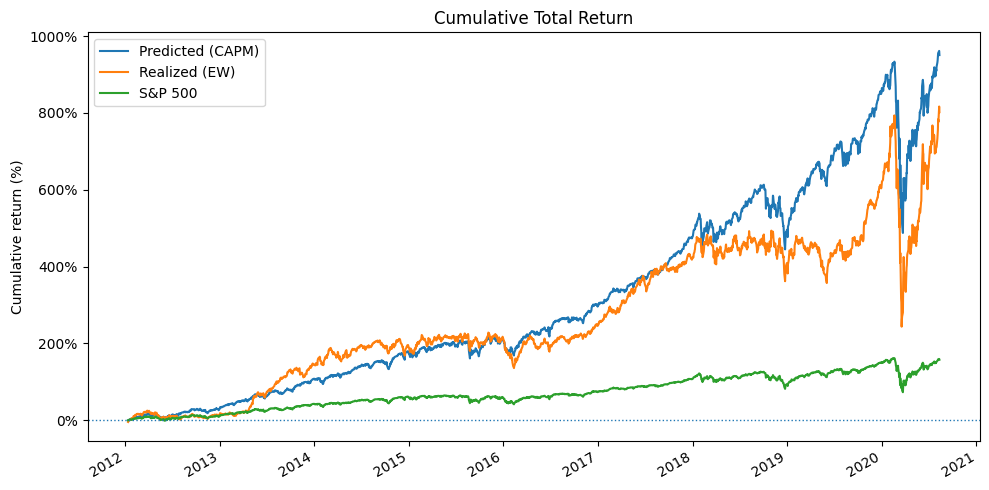

In [20]:
#plot cumulative returns

from matplotlib.ticker import PercentFormatter
from matplotlib.dates import YearLocator, DateFormatter

plot_cols = ['cum_return_capm', 'cum_return_portfolio', 'cum_return_sp500']

# Ensure Date is datetime and sorted
df = df.copy()
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date')

# Plot
plt.figure(figsize=(10,5))
x = df['Date'] if 'Date' in df.columns else df.index

plt.plot(x, df['cum_return_capm'],      label='Predicted (CAPM)')
plt.plot(x, df['cum_return_portfolio'], label='Realized (EW)')
plt.plot(x, df['cum_return_sp500'],     label='S&P 500')

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.xaxis.set_major_locator(YearLocator())            # yearly ticks
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.axhline(0, linestyle=':', linewidth=1)
plt.title('Cumulative Total Return')
plt.ylabel('Cumulative return (%)')
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
#compute CAGR

def cagr_from_cum(cum, dates=None):
    s = cum.dropna()
    growth = 1 + s.iloc[-1]
    if dates is not None:
        d = pd.to_datetime(dates.loc[s.index])
        years = (d.iloc[-1] - d.iloc[0]).days / 365.25
    else:
        years = (s.index[-1] - s.index[0]).days / 365.25 if isinstance(s.index, pd.DatetimeIndex) else len(s)/252
    return growth**(1/years) - 1

dates_vec = df['Date'] if 'Date' in df.columns else None

print(f"CAGR (Predicted - CAPM): {cagr_from_cum(df['cum_return_capm'], dates_vec):.2%}")
print(f"CAGR (Realized - EW)  : {cagr_from_cum(df['cum_return_portfolio'], dates_vec):.2%}")
print(f"CAGR (S&P 500)         : {cagr_from_cum(df['cum_return_sp500'], dates_vec):.2%}")


CAGR (Predicted - CAPM): 31.55%
CAGR (Realized - EW)  : 29.23%
CAGR (S&P 500)         : 11.65%


In [22]:
cum_pred = df['cum_return_capm'].dropna().iloc[-1]
cum_real = df['cum_return_portfolio'].dropna().iloc[-1]
cum_mkt  = df['cum_return_sp500'].dropna().iloc[-1]

print("\nTotal cumulative return:")
print(f"Predicted / CAPM : {cum_pred:.2%}")
print(f"Realized  / EW   : {cum_real:.2%}")
print(f"S&P 500          : {cum_mkt:.2%} ")



Total cumulative return:
Predicted / CAPM : 950.76%
Realized  / EW   : 802.15%
S&P 500          : 157.33% 


The equal-weight portfolio of the four highest-beta stocks massively outperforms the S&P 500 over the sample: CAGR ~29.2% versus ~11.7% for the index. The CAPM-predicted portfolio is close on average (CAGR ~31.6%). The gap between the two lines is incorporated by idiosyncratic shocks.
The daily returns series shows much higher volatility and deeper drawdowns (e.g., 2020 crisis) than the S&P.

# **Extra** - Check of the Evolution of the betas

In [23]:

# Define the calculate_rolling_beta function
def calculate_rolling_beta(stock_returns, market_returns, window):

    rolling_beta = pd.Series(index=stock_returns.index, dtype=float)

    for i in range(len(stock_returns) - window + 1):
        window_stock_returns = stock_returns.iloc[i : i + window]
        window_market_returns = market_returns.iloc[i : i + window]

        # Combine and drop NaNs for the current window
        combined_window_returns = pd.DataFrame({'stock': window_stock_returns, 'market': window_market_returns}).dropna()

        # Ensure there are enough data points for regression after dropping NaNs
        if len(combined_window_returns) >= 2 and 'market' in combined_window_returns.columns and 'stock' in combined_window_returns.columns:
            try:
                X = sm.add_constant(combined_window_returns['market'])
                model = sm.OLS(combined_window_returns['stock'], X).fit()

                # Check if 'market' parameter exists in the results
                if 'market' in model.params:
                    rolling_beta.iloc[i + window - 1] = model.params['market'] # Access the market return coefficient
                else:
                    rolling_beta.iloc[i + window - 1] = np.nan # Assign NaN if 'market' parameter not found

            except Exception as e:
                # Assign NaN if any error occurs during OLS fitting
                rolling_beta.iloc[i + window - 1] = np.nan
                # Optional: print error for debugging
                # print(f"Error during OLS fitting for window starting at index {i}: {e}")
        else:
             rolling_beta.iloc[i + window - 1] = np.nan # Assign NaN if not enough data or missing columns


    return rolling_beta


yearly_beta = {}
stocks = daily_return_df.columns.drop('sp500')

for stock in stocks:
    # Calculate rolling beta
    rolling_beta = calculate_rolling_beta(daily_return_df[stock], daily_return_df['sp500'], window=252)

    # Convert the index to datetime objects (if not already)
    rolling_beta.index = pd.to_datetime(rolling_beta.index)

    # Resample to get the last value of each year
    yearly_beta[stock] = rolling_beta.resample('YE').last()

yearly_beta_df = pd.DataFrame(yearly_beta)
yearly_beta_df.index = pd.to_datetime(yearly_beta_df.index)
yearly_beta_df = yearly_beta_df.dropna(how='all') # Drop rows where all elements are NaN
display(yearly_beta_df)

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG
Date,,,,,,,,
2013-12-31,0.626566,0.966673,0.784543,1.526288,1.265466,0.765491,1.174505,0.945169
2014-12-31,0.835490,1.021059,0.564327,1.492332,1.463360,0.729346,1.900735,1.279824
2015-12-31,1.145075,0.999672,0.721119,1.479366,1.119326,1.019357,1.136643,1.084603
2016-12-31,1.009962,1.217194,0.476372,1.669338,1.116334,0.931592,1.215942,0.952996
2017-12-31,1.378480,0.994291,0.760486,1.417016,1.328988,0.664028,1.356536,1.273356
2018-12-31,1.255978,1.311033,0.660046,1.355074,1.624503,0.966826,1.379974,1.370261
2019-12-31,1.558167,0.981311,0.577960,1.336059,1.327099,1.075293,1.317051,1.290719
2020-12-31,1.088230,1.684735,0.864835,1.810226,0.628625,1.012924,1.146980,0.920785


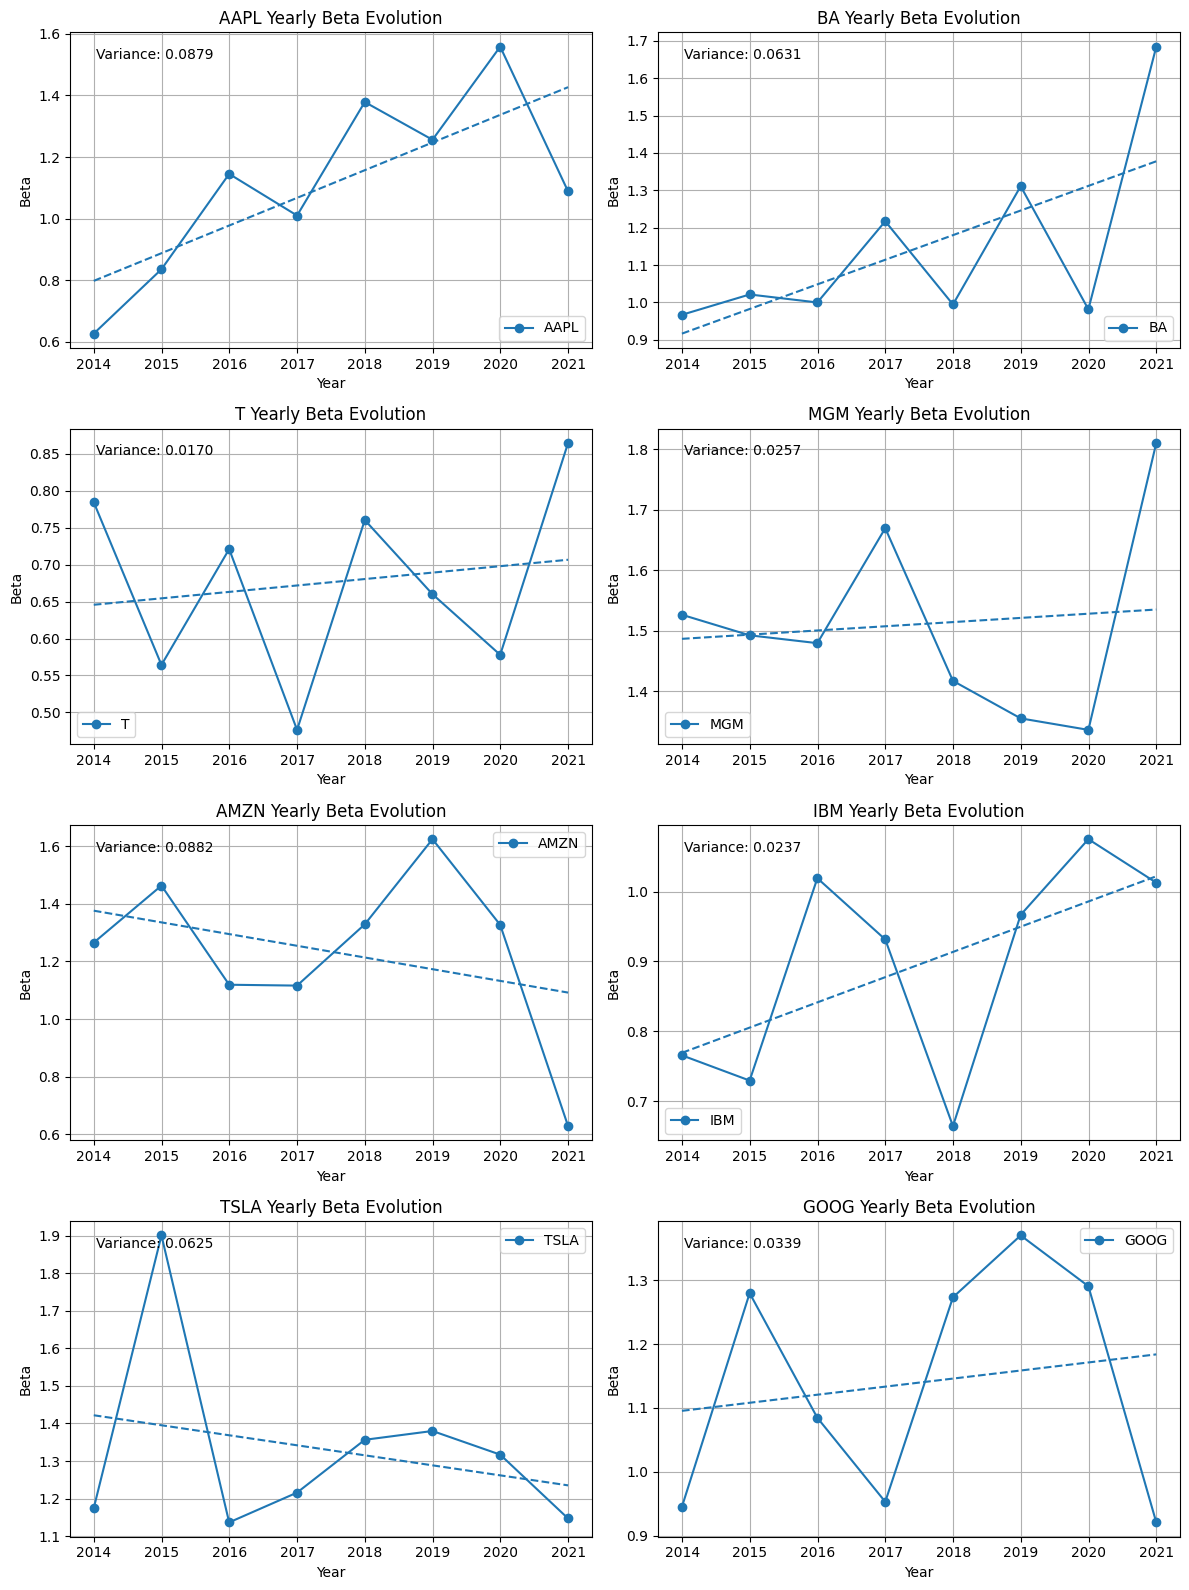

In [24]:
stocks = yearly_beta_df.columns
n_stocks = len(stocks)
n_cols = 2 # Number of columns for subplots
n_rows = (n_stocks + n_cols - 1) // n_cols # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4)) # Create a grid of subplots
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Calculate yearly beta variance for each stock
yearly_beta_variance = yearly_beta_df.var()

for i, stock in enumerate(stocks):
    ax = axes[i] # Select the current subplot

    # Plot the yearly beta line
    ax.plot(yearly_beta_df.index, yearly_beta_df[stock], marker='o', linestyle='-', label=stock)

    # Calculate and plot the trendline using OLS regression
    valid_data = yearly_beta_df[stock].dropna()
    if not valid_data.empty:
        # Create numerical representation of the date for regression
        X = sm.add_constant(np.arange(len(valid_data))) # Add a constant for the intercept
        model = sm.OLS(valid_data.values, X).fit()
        trend_line = model.predict(X)

        ax.plot(valid_data.index, trend_line, linestyle='--', color=ax.lines[-1].get_color(), linewidth=1.5) # Plot trendline with the same color and dashed style

    ax.set_title(f'{stock} Yearly Beta Evolution')
    ax.set_xlabel('Year')
    ax.set_ylabel('Beta')
    ax.grid(True)
    ax.legend()

    # Add variance to the subplot
    variance = yearly_beta_variance.loc[stock]
    ax.text(0.05, 0.95, f'Variance: {variance:.4f}', transform=ax.transAxes, fontsize=10, verticalalignment='top')


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

***Stable betas (reliable indicators):***


**T: Variance = 0.017.** Beta remains consistently below 1, mostly between 0.55 and 0.85. Variance is very low (0.017), showing remarkable stability. This reflects AT&T’s defensive business model and makes its beta a reliable predictor of how the stock will move relative to the market going forward.


**IBM: Variance = 0.024.** Beta gradually increases from ~0.7 to just above 1.0 with relatively small swings. Variance (0.024) is low, showing steady behavior. This suggests IBM’s exposure to the market is stable and its beta is a trustworthy indicator of future relative volatility.


**MGM: Variance = 0.026.** Beta stays elevated (1.4–1.8 range) with moderate variance (0.026). Although it dipped around 2018–2020, the overall pattern is fairly consistent: MGM is reliably a high-beta stock, highly sensitive to the market. Investors can expect strong amplification of market moves in both directions.

***Moderately stable (oscillates but within a narrow band):***


**GOOG: Variance = 0.034.** Beta fluctuates between 1.0 and 1.35, with a modest upward trend. Variance (0.034) is moderate, showing some movement but still within a fairly tight range. Alphabet’s beta is relatively stable compared to other growth names, making it reasonably reliable for forward-looking analysis.

***Unstable betas (less reliable):***


**TSLA: Variance = 0.062.** Beta is highly unstable, ranging from ~1.1 to nearly 1.9 in 2015, then gradually trending lower toward ~1.1 again by 2021. Variance (0.062) is high. Tesla’s dependence on sentiment, innovation cycles, and news flow make its beta very unpredictable and unreliable as a forward measure.


**BA: Variance = 0.063.** Beta increases from ~1.0 to 1.7 by 2021, with large fluctuations in between. Variance (0.063) is also high. This reflects Boeing’s cyclical exposure and company-specific crises (737 MAX, COVID). Beta here is volatile and not a stable predictor of future performance.

**AAPL: Variance = 0.088.** Beta shows a rising trend from ~0.65 in 2014 to above 1.5 in 2020 before easing in 2021. The variance (0.088) is relatively high, suggesting Apple’s sensitivity to the market has shifted over time. This makes beta less reliable as a forward-looking measure, since it depends on product cycles, market leadership, and macro shocks.


**AMZN: Variance = 0.088.** Beta is volatile: from ~1.3–1.6 between 2014–2019, then dropping sharply to ~0.6 in 2021. Variance (0.088) is high. Amazon’s shifting business mix (retail vs. AWS), changing market perception, and extraordinary events explain this instability. Beta here is not reliable as a predictor.

## **Task #3** : Testing the CAPM theory

# Part 3


In [37]:
# Get the daily returns
stocks_daily_return = df_returns.copy()
for col in stocks_daily_return.columns:
    if col != 'Date':
        stocks_daily_return[col] = stocks_daily_return[col] * 100

In [49]:
years = ['2012','2013','2014','2015','2016','2017','2018','2019','2020']

# Choose the stock columns (assumes: Date | sp500 | stock1 ...); here we take 8 stocks.
list_stock = stocks_daily_return.columns.tolist()[1:9]
# Market (S&P 500) daily returns
r_sp500 = stocks_daily_return['sp500']

# Buckets to collect results (one row per stock-year pair)
stock_name = []
alpha = []                 # intercept from OLS on year y-1 (stored, not used in prediction)
beta = []                  # beta from OLS on year y-1
realized_return = []       # realized annual return in year y
pred_current_market = []   # β(y-1) * mean market return in year y
pred_lagged_market = []    # β(y-1) * mean market return in year y-1

# Loop over each stock
for j in list_stock:
    stock = stocks_daily_return[j]  # daily returns for this stock

    # For each evaluation year y, we need y-1 to estimate beta, so loop to len(years)-1
    for i in range(len(years) - 1):
        y_minus_1 = years[i]
        y         = years[i+1]

        # --- 1) Slice daily returns for year y-1 for stock and market
        mask_y_minus_1 = (stocks_daily_return['Date'] >= f'{y_minus_1}-01-01') & \
                         (stocks_daily_return['Date'] <= f'{y_minus_1}-12-31')
        stock_y_minus_1 = stock[mask_y_minus_1].reset_index(drop=True)
        sp_y_minus_1    = r_sp500[mask_y_minus_1].reset_index(drop=True)

        # Join into a small 2-column DataFrame to run OLS (Stock on Market)
        reg_data = pd.DataFrame({'Stock': stock_y_minus_1, 'SP500': sp_y_minus_1})

        # --- 2) OLS on daily returns in year y-1: Stock_t = a + b * Market_t + e_t
        # np.polyfit(x, y, 1) returns slope (b) and intercept (a)
        b, a = np.polyfit(reg_data['SP500'], reg_data['Stock'], 1)

        # --- 3) Slice daily returns for the NEXT year y (to evaluate predictions)
        mask_y = (stocks_daily_return['Date'] >= f'{y}-01-01') & \
                 (stocks_daily_return['Date'] <= f'{y}-12-31')
        stock_y = stock[mask_y].reset_index(drop=True)
        sp_y    = r_sp500[mask_y].reset_index(drop=True)

        # --- 4) Build predictions (no alpha, no Rf; annualize mean by *252)
        # Ex-post check: use the realized mean market return of year y
        pred_y_current_mkt = b * (sp_y.mean() * 252)
        # Naive ex-ante proxy: use last year’s realized mean market return
        pred_y_lagged_mkt  = b * (sp_y_minus_1.mean() * 252)

        # --- 5) Realized annual return of the stock in year y (mean_daily * 252)
        realized_y = stock_y.mean() * 252

        # --- 6) Store everything
        stock_name.append(j)
        alpha.append(a)
        beta.append(b)
        realized_return.append(realized_y)
        pred_current_market.append(pred_y_current_mkt)
        pred_lagged_market.append(pred_y_lagged_mkt)

# ---------------------------------------------
# Build results table: one row per (stock, year y)
# Index uses evaluation years (2013..2020) repeated for each stock.
# ---------------------------------------------
out = pd.DataFrame(
    {
        'Stock'                : stock_name,
        'Alpha (y-1)'          : alpha,
        'Beta (y-1)'           : beta,
        'Realized return (y)'  : realized_return,
        'Pred: current market' : pred_current_market,  # β(y-1) * mean Rm in year y
        'Pred: lagged market'  : pred_lagged_market    # β(y-1) * mean Rm in year y-1
    },
    index = years[1:] * len(list_stock)   # 2013..2020 repeated per stock
)



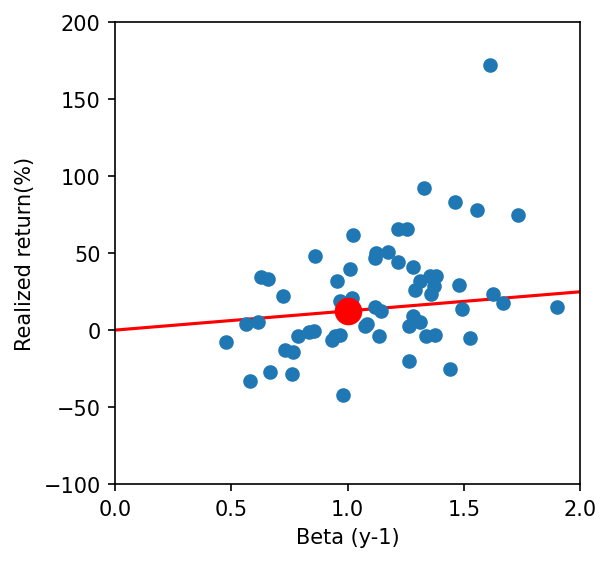

In [50]:
# Construct a scatterplot of the betas and realized returns for all stocks all years.
plt.figure(figsize = (4, 4), dpi = 150)
plt.xlim(0,2)
plt.ylim(-100,200)
plt.scatter(out.iloc[:,2], out.iloc[:,3])
plt.xlabel('Beta (y-1)')
plt.ylabel('Realized return(%)')
betas = np.linspace(0,2,1000)
SML = betas*(stocks_daily_return.sp500.mean()*252)
plt.plot(betas, SML, c = "red", zorder = -10)
plt.scatter(1, stocks_daily_return.sp500.mean()*252, s = 150, c = "r", zorder = 10)
plt.show()





The scatter plot shows little evidence that stocks with higher β earn systematically higher realized returns. The slope of the Security Market Line is nearly flat, and realized returns are highly dispersed around it. This suggests that, in our sample, CAPM has weak explanatory power for stock returns.


The CAPM says a stock’s expected excess return equals its beta times the expected market risk premium. At the start of year y, the expected market premium is unknown, to test this we made the following additions.

The next figure (ex-post CAPM): We use beta estimated from year y−1 and the realized market return in year y as a stand-in for the expected market premium. If CAPM holds and betas are measured well, predicted returns should line up with realized returns along the 45-degree line (intercept about zero, slope about one).

The one figure after we look at (ex-ante CAPM): We use beta from year y−1 and last year’s market return as a decision-time proxy for the expected market premium in year y. This asks whether CAPM gives useful forecasts using only information available at the start of year y. If this is the case, again we should see a 45 degree line.  

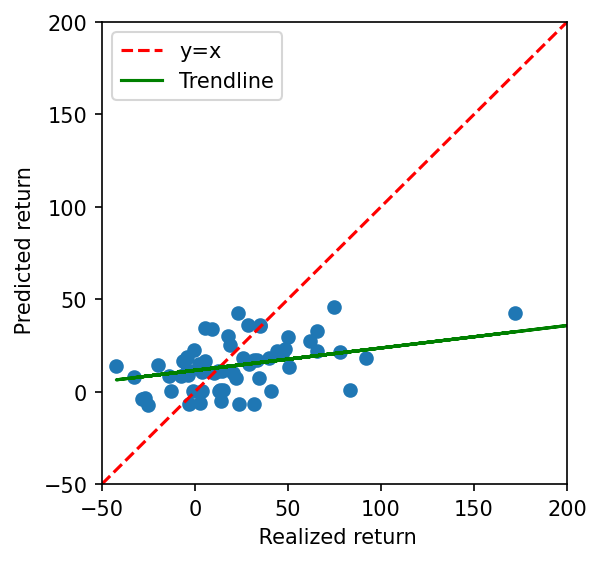

In [43]:
# Construct a scatterplot of the predicted( using current meanyear market results) and realized returns for all stocks all years.
plt.figure(figsize = (4, 4), dpi = 150)
plt.xlim(-50,200)
plt.ylim(-50,200)
plt.scatter(out.iloc[:,3],out.iloc[:,4])
plt.xlabel(' Realized return(%)')
plt.ylabel(' Predicted return(%)')

# Add y=x line
plt.plot([-50, 200], [-50, 200], color='red', linestyle='--', label='y=x')

# Add trendline
z = np.polyfit(out.iloc[:,3], out.iloc[:,4], 1)
p = np.poly1d(z)
plt.plot(out.iloc[:,3], p(out.iloc[:,3]), color='green', linestyle='-', label='Trendline')

plt.legend()
plt.show()

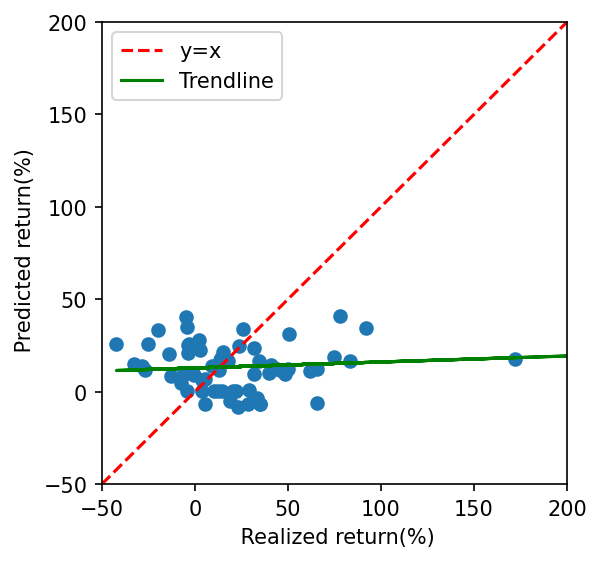

In [46]:
# Construct a scatterplot of the predicted (v2) and realized returns for all stocks all years.
plt.figure(figsize = (4, 4), dpi = 150)
plt.xlim(-50,200)
plt.ylim(-50,200)
plt.scatter(out.iloc[:,3],out.iloc[:,5])
plt.xlabel(' Realized return(%)')
plt.ylabel(' Predicted return(%)')

# Add y=x line
plt.plot([-50, 200], [-50, 200], color='red', linestyle='--', label='y=x')

# Add trendline
z = np.polyfit(out.iloc[:,3], out.iloc[:,5], 1)
p = np.poly1d(z)
plt.plot(out.iloc[:,3], p(out.iloc[:,3]), color='green', linestyle='-', label='Trendline')

plt.legend()
plt.show()

When we compare realized annual returns with CAPM predictions, we find very weak explanatory power. Using the realized market return of year y (the ex-post version, “pred_current_market”) shows only a slight positive relationship and a lot of dispersion.

Using the previous year’s market return performs even worse, with almost no correlation to realized outcomes. These results highlight the limited empirical performance of the CAPM model in our sample.

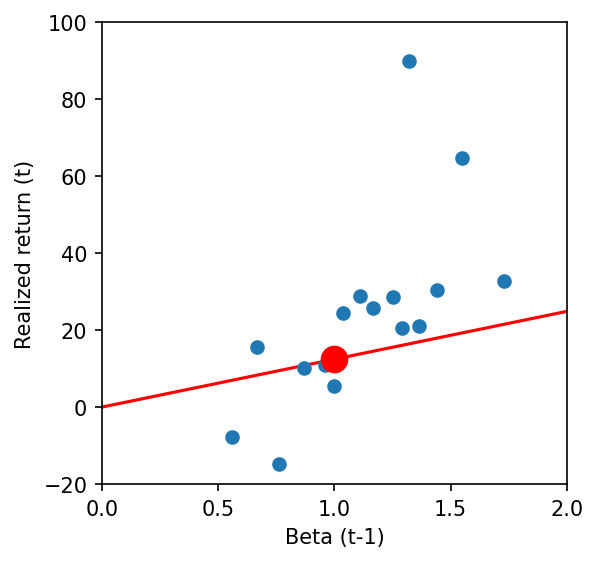

In [45]:
# Construct a scatterplot of the betas and realized returns for all stocks all years, but now binned in 4 groups. This in order to reduce the noise.
temp = out.sort_values(by = 'Beta (y-1)').reset_index().copy()
temp = temp.groupby(temp.index // 4)[['Beta (y-1)', 'Realized return (y)']].mean()
plt.figure(figsize = (4, 4), dpi = 150)
plt.xlim(0,2)
plt.ylim(-20,100)
plt.scatter(temp.iloc[:,0], temp.iloc[:,1])
plt.xlabel('Beta (t-1)')
plt.ylabel('Realized return (t)')
betas = np.linspace(0,2,1000)
SML = betas*(stocks_daily_return.sp500.mean()*252)
plt.plot(betas, SML, c = "red", zorder = -10)
plt.scatter(1, stocks_daily_return.sp500.mean()*252, s = 150, c = "r", zorder = 10)
plt.show()


In an attempt to reduce the noise we consider binned beta's. It does look a bit better compared to the non binned version, however still suggests the limitations of the CAPM model as we still see large dispersions.



Finally, we extend the timespan for the calculation of the beta to 2 years instead of one to see if outcomes differ.

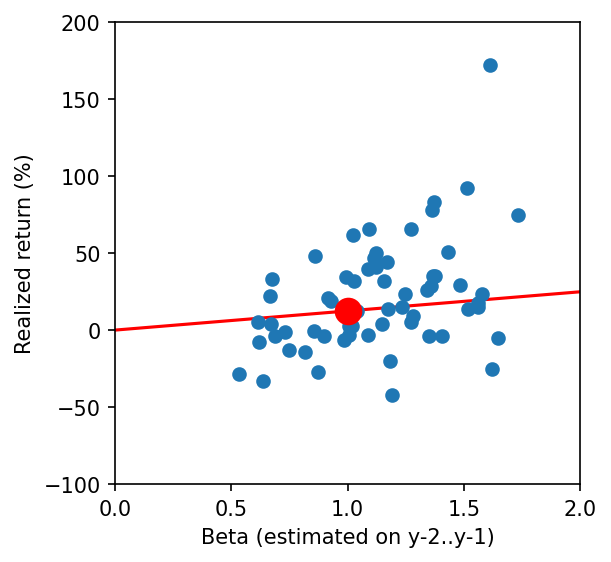

In [52]:
years = ['2012','2013','2014','2015','2016','2017','2018','2019','2020']

# Choose the stock columns (assumes: Date | sp500 | stock1 ...); here we take 8 stocks.
list_stock = stocks_daily_return.columns.tolist()[1:9]
# Market (S&P 500) daily returns
r_sp500 = stocks_daily_return['sp500']

# Buckets to collect results (one row per stock-year pair)
stock_name = []
alpha = []                 # intercept from OLS on years [y-2..y-1] (stored, not used in prediction)
beta = []                  # beta from OLS on years [y-2..y-1]
realized_return = []       # realized annual return in year y
pred_current_market = []   # β * mean market return in year y (ex-post)
pred_lagged_market = []    # β * mean market return in year y-1 (ex-ante proxy)

# Loop over each stock
for j in list_stock:
    stock = stocks_daily_return[j]  # daily returns for this stock

    # For each evaluation year y, we need the previous two years to estimate beta
    for i in range(len(years) - 1):
        y_minus_1 = years[i]     # last year in the estimation window
        y         = years[i+1]   # evaluation year

        # --- MINIMAL CHANGE: slice daily returns for the **previous TWO years** [y-2 .. y-1]
        start_two_years = str(int(y_minus_1) - 1)  # begin one calendar year earlier
        mask_two_years = (stocks_daily_return['Date'] >= f'{start_two_years}-01-01') & \
                         (stocks_daily_return['Date'] <= f'{y_minus_1}-12-31')

        stock_y_minus_1_two_years = stock[mask_two_years].reset_index(drop=True)
        sp_y_minus_1_two_years    = r_sp500[mask_two_years].reset_index(drop=True)

        # Join into a small 2-column DataFrame to run OLS (Stock on Market) over TWO years
        reg_data = pd.DataFrame({'Stock': stock_y_minus_1_two_years, 'SP500': sp_y_minus_1_two_years})

        # If not enough observations (e.g., early edge), skip
        if len(reg_data) < 60:
            continue

        # --- 2) OLS on daily returns in [y-2 .. y-1]: Stock_t = a + b * Market_t + e_t
        # np.polyfit(x, y, 1) returns slope (b) and intercept (a)
        b, a = np.polyfit(reg_data['SP500'], reg_data['Stock'], 1)

        # --- 3) Slice daily returns for the NEXT year y (to evaluate predictions)
        mask_y = (stocks_daily_return['Date'] >= f'{y}-01-01') & \
                 (stocks_daily_return['Date'] <= f'{y}-12-31')
        stock_y = stock[mask_y].reset_index(drop=True)
        sp_y    = r_sp500[mask_y].reset_index(drop=True)

        # Also grab ONLY year y-1 market mean for the "lagged" prediction (unchanged behavior)
        mask_only_y_minus_1 = (stocks_daily_return['Date'] >= f'{y_minus_1}-01-01') & \
                              (stocks_daily_return['Date'] <= f'{y_minus_1}-12-31')
        sp_y_minus_1_one_year = r_sp500[mask_only_y_minus_1].reset_index(drop=True)

        # --- 4) Build predictions (no alpha, no Rf; annualize mean by *252)
        pred_y_current_mkt = b * (sp_y.mean() * 252)                 # ex-post CAPM check
        pred_y_lagged_mkt  = b * (sp_y_minus_1_one_year.mean() * 252)  # ex-ante proxy using year y-1 mean

        # --- 5) Realized annual return of the stock in year y (mean_daily * 252)
        realized_y = stock_y.mean() * 252

        # --- 6) Store everything
        stock_name.append(j)
        alpha.append(a)
        beta.append(b)
        realized_return.append(realized_y)
        pred_current_market.append(pred_y_current_mkt)
        pred_lagged_market.append(pred_y_lagged_mkt)

# ---------------------------------------------
# Build results table: one row per (stock, year y)
# Index uses evaluation years (2013..2020) repeated for each stock.
# ---------------------------------------------
out = pd.DataFrame(
    {
        'Stock'                : stock_name,
        'Alpha (y-1)'          : alpha,
        'Beta (y-1)'           : beta,                       # estimated on two prior years
        'Realized return (y)'  : realized_return,            # 1-year realized
        'Pred: current market' : pred_current_market,        # β * mean Rm in y
        'Pred: lagged market'  : pred_lagged_market          # β * mean Rm in y-1
    },
    index = years[1:] * len(list_stock)   # 2013..2020 repeated per stock
)

# ---------------------------------------------
# Scatter: β (from two-year window) vs realized return
# ---------------------------------------------
plt.figure(figsize=(4, 4), dpi=150)
plt.xlim(0, 2)
plt.ylim(-100, 200)
plt.scatter(out.iloc[:,2], out.iloc[:,3])
plt.xlabel('Beta (estimated on y-2 & y-1)')
plt.ylabel('Realized return (%)')

betas = np.linspace(0, 2, 1000)
SML = betas * (stocks_daily_return['sp500'].mean() * 252)
plt.plot(betas, SML, c="red", zorder=-10)
plt.scatter(1, stocks_daily_return['sp500'].mean() * 252, s=150, c="r", zorder=10)
plt.show()

The results are similiar compared to the ones obtained with the beta calculated over 1 year.

All the results point in the same direction. All provide empirical evidence against the CAPM model.

# Optional

In [31]:
import yfinance as yf
import pandas as pd
import requests
import lxml
import bs4

In [32]:
#Web scraping S&P500 tickers from Wikipedia

url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
headers = {"User-Agent": "Mozilla/5.0"} # to avoid error 403

# Download HTML
html = requests.get(url, headers=headers, timeout=30).text

# Extract first table
df = pd.read_html(html, flavor="lxml")[0]

# Transform to list of strings (cleaned for yfinance)
tickers = df['Symbol'].astype(str).str.strip().str.replace(".", "-", regex=False).tolist()

/tmp/ipython-input-4085364148.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(html, flavor="lxml")[0]


In [33]:
#Download historical data for the tickers from Yahoo Finance
data = yf.download(
    tickers,
    start="2012-01-12",
    end="2020-08-11",
    group_by="ticker",# to have a multi-index dataframe
    auto_adjust=False,# to have raw prices
    progress=True # to show a progress bar
)

#Show the first 5 rows of the dataframe
print(data.head())

[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
13 Failed downloads:
ERROR:yfinance:['PLTR', 'KVUE', 'DASH', 'CEG', 'ABNB', 'HOOD', 'COIN', 'GEV', 'GEHC', 'EXE', 'APP', 'SOLV', 'VLTO']: YFPricesMissingError('possibly delisted; no price data found  (1d 2012-01-12 -> 2020-08-11) (Yahoo error = "Data doesn\'t exist for startDate = 1326344400, endDate = 1597118400")')


Ticker           LULU                                                       \
Price            Open       High        Low      Close  Adj Close   Volume   
Date                                                                         
2012-01-12  60.139999  61.730000  59.930000  61.240002  61.240002  3367700   
2012-01-13  61.060001  62.119999  60.759998  61.959999  61.959999  2815100   
2012-01-17  62.389999  62.680000  60.549999  60.680000  60.680000  2703100   
2012-01-18  60.980000  60.980000  59.880001  60.509998  60.509998  2305700   
2012-01-19  60.930000  61.000000  59.869999  60.139999  60.139999  2491400   

Ticker            IRM                                   ...        USB  \
Price            Open       High        Low      Close  ...        Low   
Date                                                    ...              
2012-01-12  29.214418  29.325323  28.900185  29.131239  ...  28.150000   
2012-01-13  29.038816  29.482441  29.011091  29.158964  ...  28.340000   
2012-

Looking at the output of this code we immediately notice how 13 errors occurred while downloading the data, this could be due to the fact that some of the companies that are now included in the S&P 500 were not in the time span given as input to download the data (Airbnb's IPO was in 2021).
You may also see missing values for some tickers on certain dates (newly added companies, ticker changes, trading suspensions).

For each stock, the API provides six time series (Open, High, Low, Close, Adj Close, and Volume), instead the PCLab_Data.xlsx file only contained daily closing prices for 8 stocks.
The Adjusted Close variable is especially important since it accounts for dividends and stock splits and is typically used to compute total returns.

In conclusion, the yfinance data is much more informative as, in addition to prices, it can be used to retreive information about volatility (via the High and Low series) and liquidity (via the Volume series).